# Principal Component Analysis

Dimensionality reduction from scratch.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SklearnPCA

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
np.random.seed(42)

---
## PCA From Scratch

In [2]:
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None
    
    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Covariance matrix
        cov = np.cov(X_centered.T)
        
        # Eigendecomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # Sort by eigenvalue (descending)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # Store components
        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance = eigenvalues[:self.n_components]
        
        return self
    
    def transform(self, X):
        X_centered = X - self.mean
        return X_centered.dot(self.components)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

print('PCA class ready')

PCA class ready


---
## Test on Iris Dataset

In [3]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f'Original shape: {X.shape}')
print(f'Features: {iris.feature_names}')

Original shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Our PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Sklearn PCA
pca_sklearn = SklearnPCA(n_components=2)
X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)

print('='*60)
print('PCA COMPARISON')
print('='*60)
print(f'Our PCA shape: {X_pca.shape}')
print(f'Sklearn PCA shape: {X_pca_sklearn.shape}')
print(f'\nOur explained variance: {pca.explained_variance}')
print(f'Sklearn explained variance: {pca_sklearn.explained_variance_}')
print(f'\nVariance ratio (ours): {pca.explained_variance / pca.explained_variance.sum()}')
print(f'Variance ratio (sklearn): {pca_sklearn.explained_variance_ratio_}')

PCA COMPARISON
Our PCA shape: (150, 2)
Sklearn PCA shape: (150, 2)

Our explained variance: [2.93808505 0.9201649 ]
Sklearn explained variance: [2.93808505 0.9201649 ]

Variance ratio (ours): [0.76150718 0.23849282]
Variance ratio (sklearn): [0.72962445 0.22850762]


---
## Visualize Results

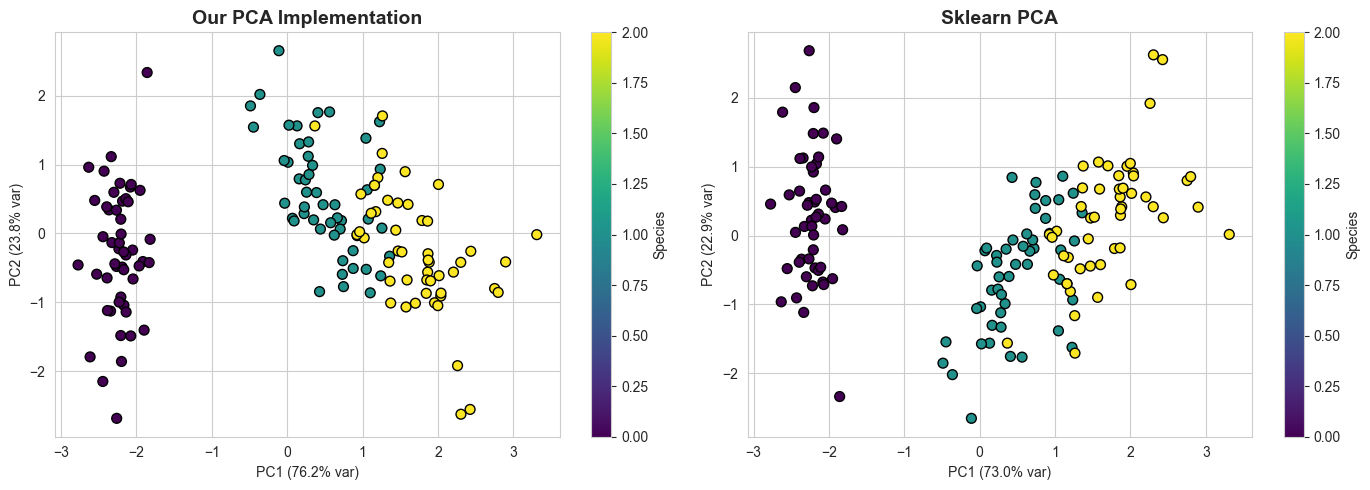

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Our PCA
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', 
                          s=50, edgecolors='k')
axes[0].set_title('Our PCA Implementation', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance[0]/pca.explained_variance.sum():.1%} var)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance[1]/pca.explained_variance.sum():.1%} var)')
plt.colorbar(scatter1, ax=axes[0], label='Species')

# Sklearn PCA
scatter2 = axes[1].scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=y, 
                          cmap='viridis', s=50, edgecolors='k')
axes[1].set_title('Sklearn PCA', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca_sklearn.explained_variance_ratio_[0]:.1%} var)')
axes[1].set_ylabel(f'PC2 ({pca_sklearn.explained_variance_ratio_[1]:.1%} var)')
plt.colorbar(scatter2, ax=axes[1], label='Species')

plt.tight_layout()
plt.show()

---
## Variance Explained Analysis

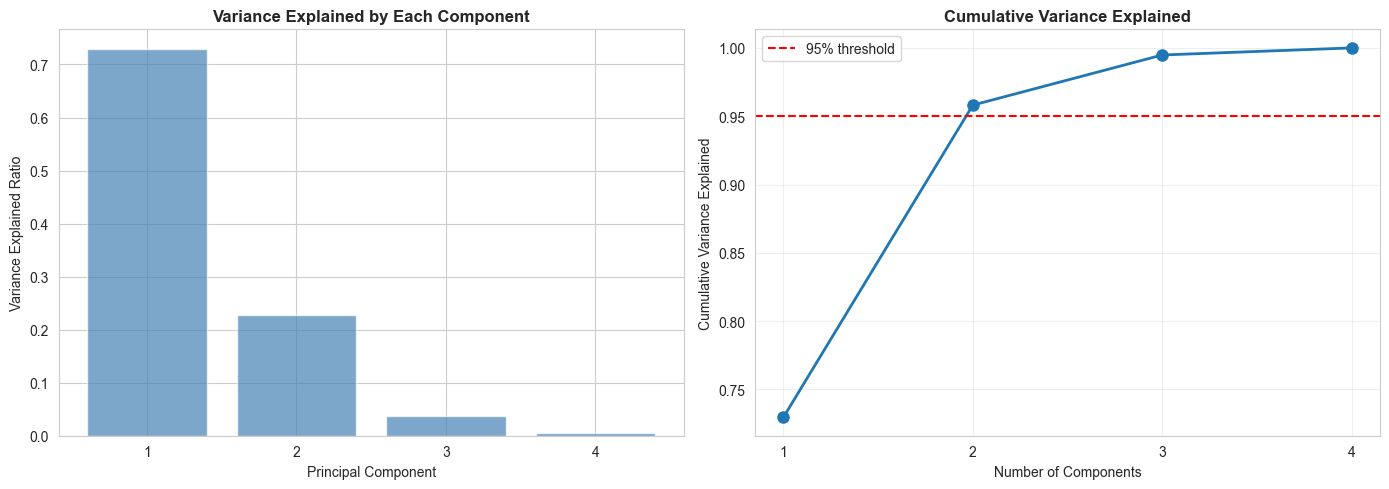

Components needed for 95% variance: 2


In [6]:
# Fit with all components
pca_full = PCA(n_components=4)
pca_full.fit(X_scaled)

# Calculate variance ratios
var_ratio = pca_full.explained_variance / pca_full.explained_variance.sum()
cum_var_ratio = np.cumsum(var_ratio)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual variance
axes[0].bar(range(1, 5), var_ratio, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained Ratio')
axes[0].set_title('Variance Explained by Each Component', fontweight='bold')
axes[0].set_xticks(range(1, 5))

# Cumulative variance
axes[1].plot(range(1, 5), cum_var_ratio, 'o-', linewidth=2, markersize=8)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance Explained')
axes[1].set_title('Cumulative Variance Explained', fontweight='bold')
axes[1].set_xticks(range(1, 5))
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Components needed for 95% variance: {np.argmax(cum_var_ratio >= 0.95) + 1}')

---
## Digits Dataset Example

In [7]:
# Load digits
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f'Original digits shape: {X_digits.shape}')
print(f'Number of features: {X_digits.shape[1]}')

# Standardize
X_digits_scaled = StandardScaler().fit_transform(X_digits)

# Apply PCA
pca_digits = PCA(n_components=2)
X_digits_pca = pca_digits.fit_transform(X_digits_scaled)

print(f'Reduced shape: {X_digits_pca.shape}')
print(f'Variance preserved: {pca_digits.explained_variance.sum() / X_digits_scaled.var(axis=0).sum():.1%}')

Original digits shape: (1797, 64)
Number of features: 64
Reduced shape: (1797, 2)
Variance preserved: 21.6%


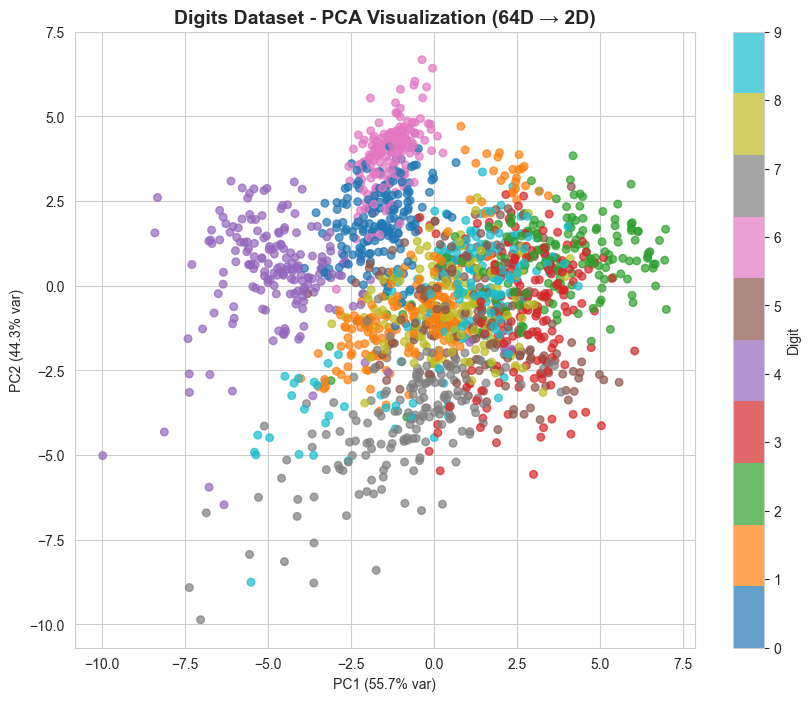

In [8]:
# Visualize
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], 
                     c=y_digits, cmap='tab10', s=30, alpha=0.7)
plt.colorbar(scatter, label='Digit')
plt.xlabel(f'PC1 ({pca_digits.explained_variance[0]/pca_digits.explained_variance.sum():.1%} var)')
plt.ylabel(f'PC2 ({pca_digits.explained_variance[1]/pca_digits.explained_variance.sum():.1%} var)')
plt.title('Digits Dataset - PCA Visualization (64D → 2D)', fontsize=14, fontweight='bold')
plt.show()

---
## Summary

**Key Points:**
- PCA finds directions of maximum variance
- Based on eigendecomposition of covariance matrix
- First principal component captures most variance
- Commonly keep components explaining 95% of variance
- Essential to standardize data before PCA

**Key Point:** "PCA transforms data to new coordinate system where axes (principal components) are ordered by variance captured. This allows dimensionality reduction while preserving maximum information."